In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

GR-KURUMI analogread analysis


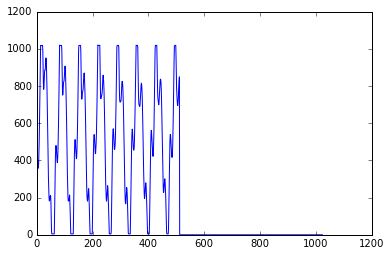

In [8]:
N=1024 #adc=N\2
N2=int(N/2)
data=np.loadtxt('kurumi_1024_LowG0.dat', delimiter=',')
ts = np.linspace(0,N,N);
plt.plot(ts,data[0:N])

sig=np.sin(5*2*np.pi * ts)+1
sig=sig*512
#plt.plot(ts,data[0:N], ts+55,data[0:N], ts,sig)
plt.show()

In [32]:
def funcM(x,t):
    ret=sum(x[0:N2])+sum(x[t:N2+t])
    return ret

In [3]:
N=1024
N2=int(N/2)
x=data
x=(x-512)/512
x[N2:N] = np.zeros(N2)

# smarter way paper
F=np.fft.fft(x)
#plt.plot(np.real(F))
ps=np.real(F*np.conjugate(F))
Finv=np.fft.ifft(ps)
r=np.real(Finv)
x2=x*x
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
#plt.plot(m)
r=r[0:N2]
nsdf=2*r/m
plt.plot(nsdf)
#print(nsdf)

ValueError: could not broadcast input array from shape (512) into shape (0)

-- fft --
[ 0.02244186+0.j          0.00682344+0.00143383j  0.02377977-0.00232501j
  0.00725639+0.00375169j  0.02679875-0.00516619j  0.00845084+0.00719445j
  0.03382493-0.00976112j  0.01124696+0.01366057j  0.05296310-0.02021713j
  0.02120756+0.03428553j]
-- ps --
[ 0.12893114  0.01244548  0.14614609  0.01708298  0.19068476  0.03153329
  0.31728775  0.08015496  0.82273853  0.41606608]
-- ifft --
[-0.07875200 -1.79367697e-16j -0.06738834 -2.16745990e-16j
 -0.05496570 -1.21430643e-17j -0.04170888 -3.59353728e-17j
 -0.02785242 -8.87690529e-19j -0.01364059 +3.93065639e-18j
  0.00068042 +4.15384957e-18j  0.01486014 +3.12030428e-17j
  0.02865747 +5.32038335e-17j  0.04183831 +1.04076209e-16j]
-- ms --
[ 0.25283914  0.25283914  0.25282242  0.25275751  0.2526144   0.25237026
  0.25200762  0.25151674  0.25089965  0.25016527]
max r= 0.126419570297 , max m= 0.252839140594
-- nsdf --
[ 1.          0.98868111  0.96053436  0.91626322  0.85683144  0.78338443
  0.69722349  0.59980714  0.49271631  0.3776

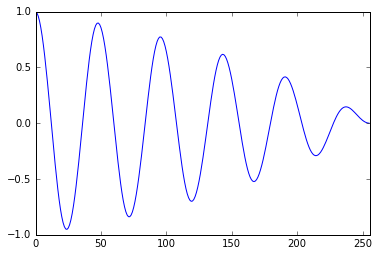

In [40]:

# overflow considering
F=np.fft.fft(x)/N             #scale to avoid overflow here
print("-- fft --")
print(F[0:10])
ps=np.real(F*np.conjugate(F))*N/2  #multiply N to get better resolution
print("-- ps --")
print(ps[0:10])
#plt.plot(ps[30:40])
ifftps=np.fft.ifft(ps)           #no scaling
print("-- ifft --")
print(ifftps[30:40])
r=np.real(ifftps)
#plt.plot(r)
x2=x*x/(N*2)                       #avoid overflow
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
print("-- ms --")
print(m[0:10])
#plt.plot(m)
r=r[0:N2]
print("max r=", np.max(r), ", max m=", np.max(m))
nsdf=2*r/(m)                #avoid overflow here
print("-- nsdf --")
print(nsdf[0:50])
plt.plot(nsdf)
plt.xlim([0,N2])
plt.show()

In [7]:
#512*1024adc and min, max w/o advertising
#ts=np.array([38902980, 38901476, 38900266, 38900491, 38900613,38900814 ])
#ts=ts*2/1000/1000

In [5]:
print(ts)
tavg=np.average(ts)
T=tavg

print("1024*1024 sampling took T=",T, "sec")
freq=1/(T)*1024*1024
print("freq per sample=", round(freq), "T per sample=", T/(1024*1024))
print("freq per 1024samples=", round(freq*1024))
ns=np.arange(N2)
freqs=1/(ns*T/1024/1024)
freqs[0]=0
#print("freqs=\n", freqs)
k=np.log10(2**(1/12))
midinotes=np.round(np.log10(freqs/27.5)/k)+21
midinotes[0]=0
# array to use in program
print(midinotes)

[ 79.072  79.068  79.084]
1024*1024 sampling took T= 79.0746666667 sec
freq per sample= 13261.0 T per sample= 7.54114786784e-05
freq per 1024samples= 13578835.0
[   0.  128.  116.  109.  104.  100.   97.   94.   92.   90.   88.   86.
   85.   84.   82.   81.   80.   79.   78.   77.   76.   75.   74.   74.
   73.   72.   72.   71.   70.   70.   69.   69.   68.   67.   67.   66.
   66.   65.   65.   65.   64.   64.   63.   63.   62.   62.   62.   61.
   61.   61.   60.   60.   60.   59.   59.   59.   58.   58.   58.   57.
   57.   57.   57.   56.   56.   56.   55.   55.   55.   55.   54.   54.
   54.   54.   53.   53.   53.   53.   53.   52.   52.   52.   52.   51.
   51.   51.   51.   51.   50.   50.   50.   50.   50.   49.   49.   49.
   49.   49.   49.   48.   48.   48.   48.   48.   48.   47.   47.   47.
   47.   47.   47.   46.   46.   46.   46.   46.   46.   46.   45.   45.
   45.   45.   45.   45.   45.   44.   44.   44.   44.   44.   44.   44.
   43.   43.   43.   43.   43.   43.

In [6]:
k=np.log10(2**(1/12))
np.round(np.log10(258.3026/27.5)/k)+21

60.0

In [7]:
ns8=np.arange(N2*8)
freqs8=1/((ns8/8)*T/1024/1024)
freqs8[0]=0
#print("freqs=\n", freqs)
midinotes8=np.round(np.log10(freqs8/27.5)/k)+21
midinotes8[0] = 0
# array to use in program
print(midinotes8)
f = open('NoteTable8.h', 'w')
f.write("#ifndef _NOTETABLE8_H_\n")
f.write("#define _NOTETABLE8_H_\n\n")
f.write("static const uint8_t kNoteTable8[] = {\n")
counter=0
for x in midinotes8 :
    if(counter % 8 == 0) :
        f.write("\t")
    f.write(np.str(int(x)))
    if(counter+1<np.size(midinotes8)):
        f.write(",")
    if(counter % 8 == 7) :
        f.write("\n")
    counter=counter+1
f.write("};\n\n")
f.write("#endif\n\n")
f.close()

[   0.  164.  152. ...,   20.   20.   20.]


In [9]:
notemax=np.max(midinotes8)
f = open('NoteTable8IndexRange.h', 'w')
f.write("#ifndef _NOTETABLE8INDEXRANGE_H_\n")
f.write("#define _NOTETABLE8INDEXRANGE_H_\n\n")
f.write("\n")
f.write("typedef struct NoteTableIndexRange_tag {\n")
f.write("\tuint16_t min_idx;\n")
f.write("\tuint16_t max_idx;\n")
f.write("} NoteTableIndexRange_t;\n")
f.write("\n")
f.write("static const NoteTableIndexRange_t kNoteTable8IndexRange[] = {\n")
counter=0
for x in np.arange(0,notemax):
    indices = np.where(midinotes8 == x)
    if(np.size(indices) == 0) :
        f.write("\t")
        f.write("{ 0,\t0},\n")
    else :
        #print(x, np.min(indices), np.max(indices))
        f.write("\t{ ")
        f.write(np.str(np.min(indices)))
        f.write(",\t")
        f.write(np.str(np.max(indices)))
        f.write("},\n")
    counter=counter+1
f.write("};\n\n")
f.write("#endif\n\n")
f.close()

In [4]:
#128*1024*8 adc
ts=np.array([1*60+45.828-26.756, 2*60+4.896-45.828, 1*60+24.001-4.917 ])
print(ts)
np.mean(ts)

[ 79.072  79.068  79.084]


79.074666666666658

In [102]:
import re
import datetime
f = open('kurumi_measurement_battery.log')
lines = f.readlines()
f.close()
counter=0
ts = np.array([])
for line in lines:
    #print("testing line:", line)
    pat = re.compile(r".*start$")
    m=pat.match(line)
    if(m) :
        #print("matched ", m.group())
        if(counter < len(lines)) : # has next line
            #print("next line ", lines[counter+1])
            #parse start line
            #pat_start=re.compile(r"\[\w\w\w\s(\w\w\w\s\d\d\s\d\d:\d\d:\d\d\.\d\d\d\s\d{4,4})\]")
            pat_time = re.compile(r"^\[(.+\d{4,4})\]")
            m_start  = pat_time.match(line)
            m_end    = pat_time.match(lines[counter+1])
            if(m_end == None and counter+2 < len(lines)) : #try next line in case of CR+LF
                m_end    = pat_time.match(line[counter+2])
            if(m_start and m_end):
                #print("data=",m_start.group(1))
                #print("data=",m_end.group(1))
                st=datetime.datetime.strptime(m_start.group(1), "%a %b %d %H:%M:%S.%f %Y")
                et=datetime.datetime.strptime(m_end.group(1), "%a %b %d %H:%M:%S.%f %Y")
                #print("parsed time=",st)
                #print("parsed time=",et)
                #print("time",(et-st).total_seconds())
                ts=np.append(ts,(et-st).total_seconds())
    counter=counter+1
print(ts)

[ 79.073  79.089  79.073  79.095  79.085  79.09   79.071  79.09   79.07
  79.073]
